In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,r2_score,mean_squared_error

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.isnull().sum() #count of null values

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [10]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.drop(['key'],inplace=True,axis=1)

In [12]:
#df.dropna(inplace=True) #drop null values

In [13]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True) #filling the null values using the mean of a column

In [14]:
df.count() #count of non-null values 

fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    200000
dropoff_latitude     200000
passenger_count      200000
dtype: int64

In [15]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce') # convert the data type of a column fom object to datetime

In [17]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [18]:
df=df.assign(date=df['pickup_datetime'].dt.date,
         month=df['pickup_datetime'].dt.month,
         year=df['pickup_datetime'].dt.year,
         hour=df['pickup_datetime'].dt.hour)  # assign() function is used to add new column in the dataframe


In [19]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,5,2015,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,7,2009,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,8,2009,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,6,2009,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,8,2014,17


In [21]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'year', 'hour'],
      dtype='object')

fare_amount             AxesSubplot(0.125,0.772143;0.352273x0.107857)
pickup_longitude     AxesSubplot(0.547727,0.772143;0.352273x0.107857)
pickup_latitude         AxesSubplot(0.125,0.642714;0.352273x0.107857)
dropoff_longitude    AxesSubplot(0.547727,0.642714;0.352273x0.107857)
dropoff_latitude        AxesSubplot(0.125,0.513286;0.352273x0.107857)
passenger_count      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
month                   AxesSubplot(0.125,0.383857;0.352273x0.107857)
year                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
hour                    AxesSubplot(0.125,0.254429;0.352273x0.107857)
dtype: object

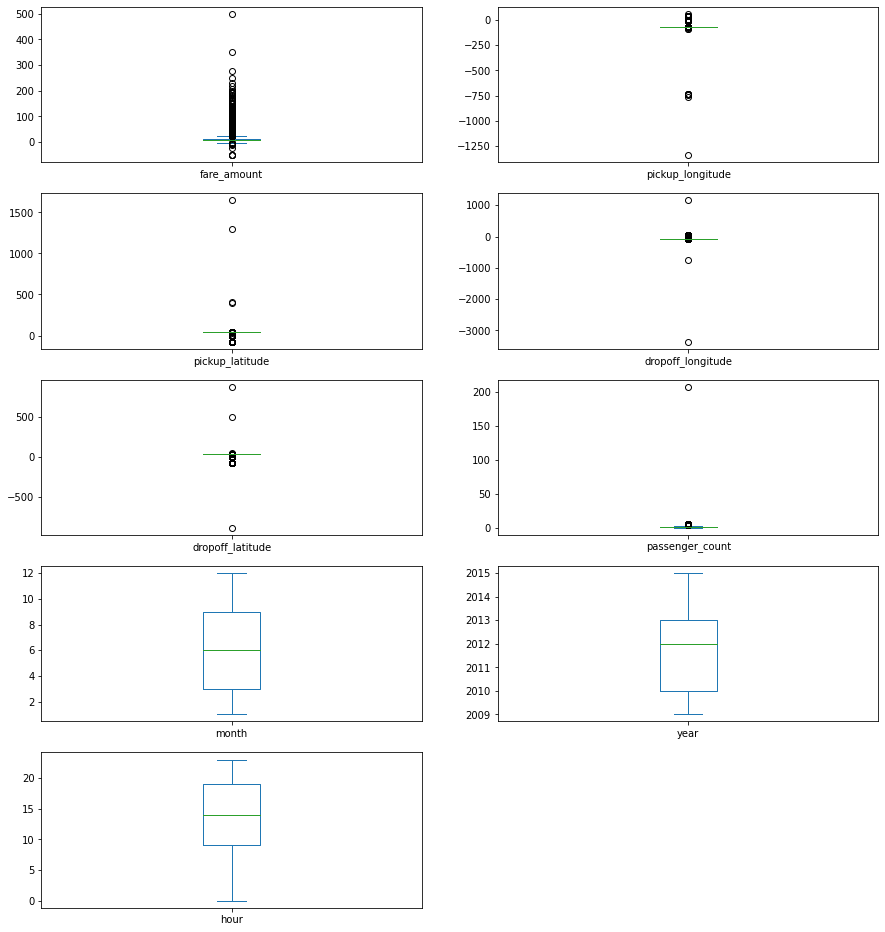

In [22]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(15,20))

In [23]:
def remove_outliers(df1,col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    lower_whisker=q1-1.5*IQR
    upper_whisker=q3+1.5*IQR
    df1[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1

In [24]:
li=df.columns

In [25]:
li

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'year', 'hour'],
      dtype='object')

In [26]:
for i in li:
    remove_outliers(df,i)

fare_amount             AxesSubplot(0.125,0.772143;0.352273x0.107857)
pickup_longitude     AxesSubplot(0.547727,0.772143;0.352273x0.107857)
pickup_latitude         AxesSubplot(0.125,0.642714;0.352273x0.107857)
dropoff_longitude    AxesSubplot(0.547727,0.642714;0.352273x0.107857)
dropoff_latitude        AxesSubplot(0.125,0.513286;0.352273x0.107857)
passenger_count      AxesSubplot(0.547727,0.513286;0.352273x0.107857)
month                   AxesSubplot(0.125,0.383857;0.352273x0.107857)
year                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
hour                    AxesSubplot(0.125,0.254429;0.352273x0.107857)
dtype: object

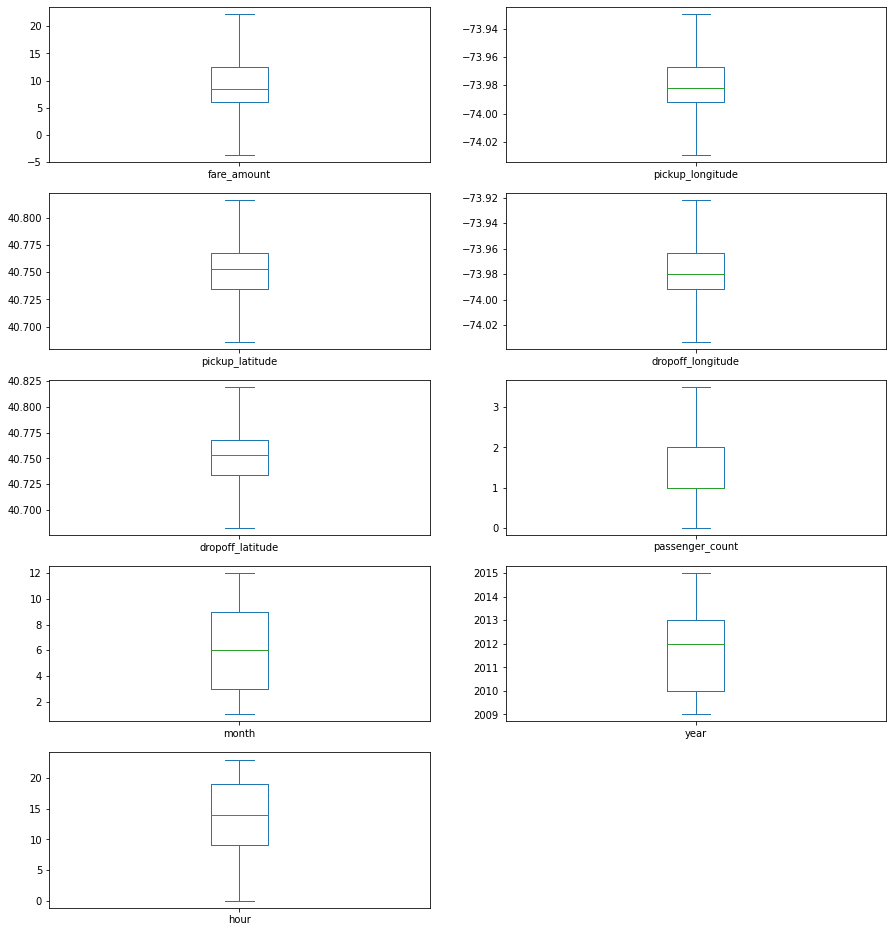

In [27]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(15,20))

In [28]:
#function to calculate travel distance fro the longitude and latitude

'''def distance_transform(long1,lat1,long2,lat2):
    travel_dist=[]
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist
 '''       

#Heversine formula
#hav(θ) = sin**2(θ/2).

'def distance_transform(long1,lat1,long2,lat2):\n    travel_dist=[]\n    for pos in range(len(longitude1)):\n        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])\n        dist_long = long2 - long1\n        dist_lati = lati2 - lati1\n        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2\n        c = 2 * asin(sqrt(a))*6371\n        travel_dist.append(c)\n    return travel_dist\n '

In [44]:
from math import *
#function to calculate travel distance fro the longitude and latitude
def distance_cal(longi1,lati1,longi2,lati2):
    travel_dist=[]
    for i in range(len(longi1)):
        long1,lat1,long2,lat2=map(math.radians,[longi1[i],lati1[i],longi2[i],lati2[i]])
        dist_long=long2-long1
        dist_lat=lat2-lat1
        a=sin(dist_lat/2)**2+cos(lat1)*cos(lat2)*sin(dist_long/2)**2
        c=2*asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist

In [45]:
df['dist_travel_km']=distance_cal(df['pickup_longitude'].to_numpy(),
                                  df['pickup_latitude'].to_numpy(),
                                 df['dropoff_longitude'].to_numpy(),
                                 df['dropoff_latitude'].to_numpy())

In [46]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'year', 'hour', 'dist_travel_km'],
      dtype='object')

In [48]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

<AxesSubplot:>

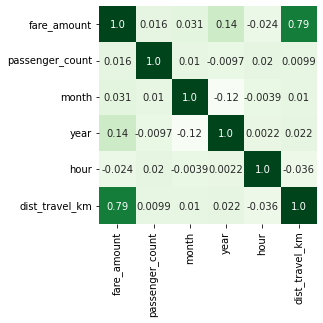

In [51]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,cbar=False,square=True,fmt='.2',annot=True,cmap='Greens')

In [66]:
x=df[['dist_travel_km']]

In [67]:
x

,dist_travel_km
0,1.683323
1,2.457590
2,5.036377
3,1.661683
4,4.116083
...,...
199995,0.112210
199996,1.875050
199997,8.919406
199998,3.539715


In [92]:
y=df['fare_amount']

In [93]:
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199995     3.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 200000, dtype: float64

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [95]:
model=LinearRegression()

In [96]:
model.fit(x_train,y_train)

LinearRegression()

In [97]:
pred=model.predict(x_test)

In [98]:
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error

In [99]:
r2_score(y_test,pred)

0.6220185556533778

In [100]:
mean_squared_error(y_test,pred)

11.227252394408435

In [101]:
mean_absolute_error(y_test,pred)

2.288984720724279

In [102]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees

In [103]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
y_pred=rf.predict(x_test)

In [105]:
r2_score(y_test,y_pred)

0.5394978973506209